<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/MNIST_CNN_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8079 - loss: 0.6089 - val_accuracy: 0.9816 - val_loss: 0.0613
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9685 - loss: 0.1068 - val_accuracy: 0.9869 - val_loss: 0.0414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9769 - loss: 0.0778 - val_accuracy: 0.9889 - val_loss: 0.0340
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9825 - loss: 0.0562 - val_accuracy: 0.9893 - val_loss: 0.0302
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9843 - loss: 0.0509 - val_accuracy: 0.9911 - val_loss: 0.0267
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9904 - val_loss: 0.0278
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9908 - val_loss: 0.0282
Epoch 8/10
469/469 ━━━━━━━━━━━

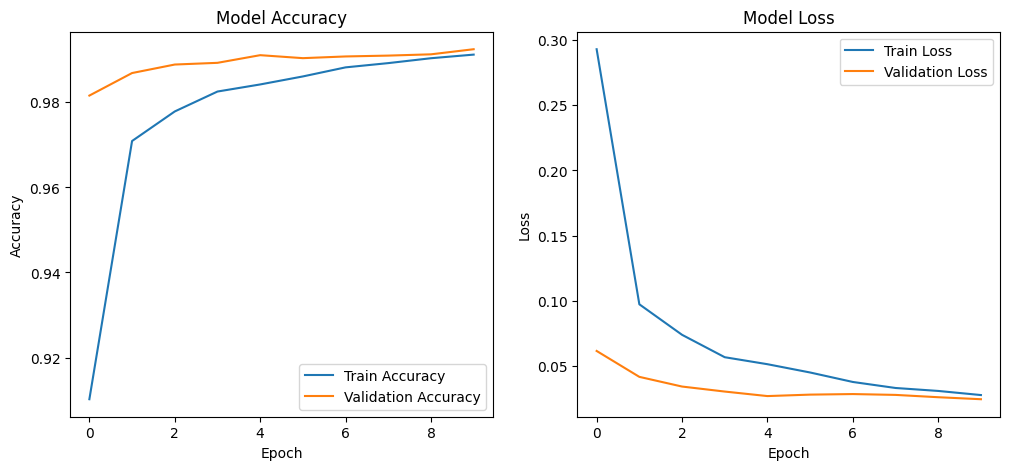

In [ ]:
#  Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST Dataset (0–9 digits)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Normalize (scale pixel values 0–1)
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Reshape for CNN
X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)

# 4. One-hot encode labels (0–9)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build the CNN Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),   # prevents overfitting
    layers.Dense(10, activation='softmax')
])

#Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

# 8. Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")

#9. Plot Accuracy and Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
